# Classification
Jérémy Le Joncour, Julien Faruga, Amaury Bonneau

## 1 Préparation des données
### 1.1 Téléchargement de données

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

In [2]:
mnist = fetch_openml('mnist_784', version=1)

### 1.2 Information sur les données

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
x = mnist['data']

In [5]:
y = mnist['target']

In [6]:
x.shape

(70000, 784)

In [7]:
(len(x),1)

(70000, 1)

In [8]:
y.shape

(70000,)

In [9]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

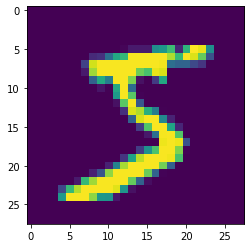

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x[0].reshape(28,28))

In [11]:
y[0]

'5'

In [12]:
type(y[0])

str

In [13]:
y = y.astype(int)

In [14]:
type(y[0])

numpy.int32

### 1.3 Répartition des données

In [137]:
x_app, x_test, y_app, y_test = x[:60000], x[60000:], y[:60000], y[60000:] 

print(f'X_app :\t {x_app.shape}')
print(f'X_test : {x_test.shape}')
print(f'Y_app :\t {y_app.shape}')
print(f'Y_test : {y_test.shape}')

X_app :	 (60000, 784)
X_test : (10000, 784)
Y_app :	 (60000,)
Y_test : (10000,)


## 2 Apprentissage d’un classifieur binaire

### 2.1 Apprentissage des données

In [16]:
y_app_5 = (y_app == 5)
y_test_5 = (y_test == 5)

In [17]:
y_app_5

array([ True, False, False, ...,  True, False, False])

In [18]:
y_test_5

array([False, False, False, ..., False,  True, False])

In [19]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(x_app, y_app_5)

SGDClassifier()

In [20]:
y_pred = model.predict(x_app[[0]])
y_pred

array([False])

### 2.2 Évaluation du modèle d’apprentissage sur les données d’apprentissage

#### 2.2.1 Taux de classification

Une première évaluation du modèle d'apprentissage est effectué pour une classification binaire. On l'effectue afin que notre modèle répartisse nos images en fonction de s'il représente un chiffre 5 ou non.

In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_app, y_app_5, scoring="accuracy", cv=3)
scores

array([0.9651, 0.9577, 0.9584])

In [22]:
scores.mean()

0.9604

In [23]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, x, y):
        pass
    def predict(self, x):
        return np.zeros((len(x),1), dtype=bool)

object_no_5 = Never5Classifier()
object_no_5.fit(x_app, y_app_5)

In [24]:
scores = cross_val_score(object_no_5, x_app, y_app_5, scoring="accuracy", cv=3)
scores

array([0.91125, 0.90855, 0.90915])

In [42]:
scores.mean()

0.90965

La moyenne de nos scores avec notre modèle `object_no_5` est de 0.91, ce qui parait élevé. En réalité, notre modèle à 1 chance sur 10 de se tromper en considérant un 5 sur une image qui représente autre chose que ce chiffre. En effet, les deux classes à comparer ne sont pas de la même taille :
* La proportion de données dans la classe *'autre que 5'* est 10 fois plus élevée que celle de la classe des images représentant un 5.

In [46]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, x_app , y_app_5, cv=3)

#### 2.2.2 Matrice de confusion

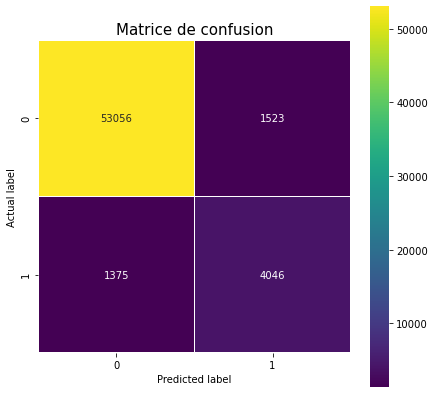

In [147]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_app_5, y_app_pred)

plt.figure(figsize=(7,7))
sns.heatmap(c_m, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Matrice de confusion", size = 15)
plt.show()

La première classe, représentant les images réprésentant un chiffre autre que 5 (1ère ligne de notre matrice) contient 53111 images correctement classées (vrais positives) et 1468 faux négatives, la deuxième classe, devant contenir les images repéresentant un 5, contient 4253 vrais positifs correctement classées mais 1268 faux négatives.

#### 2.2.3 Précision et rappel

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f'F1 :\t \t {f1_score(y_app_5, y_pred)}')
print(f'Précision :\t {precision_score(y_app_5, y_pred)}')
print(f'Rappel :\t {recall_score(y_app_5, y_pred)}')

F1 :	 	 0.7363057324840765
Précision :	 0.7265218172023703
Rappel :	 0.7463567607452499


In [29]:
y_score = cross_val_predict(model, x_app, y_app_5, method = 'decision_function', cv = 3)
y_score

array([ -1652.04277755, -24992.86785165, -34301.07203326, ...,
         5360.92622612,   -635.20885735, -12223.87715537])

In [32]:
from sklearn.metrics import precision_recall_curve
precision_recall_curve(y_app_5, y_score)

(array([0.09071133, 0.09069612, 0.09069764, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]),
 array([-70141.00604277, -70044.22332753, -69934.46111441, ...,
         31952.43211364,  32204.70780402,  39031.00650673]))

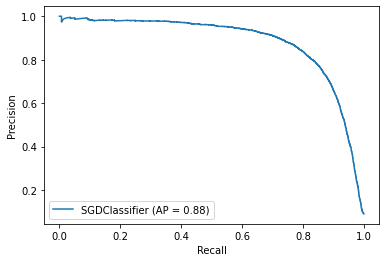

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(model, x_app, y_app_5)

#### 2.2.4 Courbe ROC

In [84]:
from sklearn.metrics import roc_curve
tfp, tvp, thresholds = roc_curve(y_app, y_score, pos_label=2)
tvp

array([0.        , 0.        , 0.        , ..., 0.99983216, 1.        ,
       1.        ])

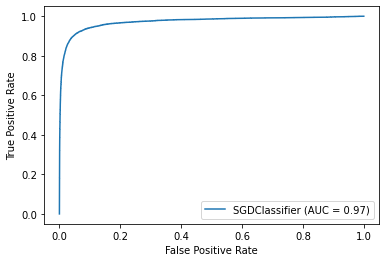

In [90]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, x_app, y_app_5)

In [91]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_app_5, y_score)

0.9597504479957886

## 3 Apprentissage d’un classifieur multi-classes

### 3.1 Apprentissage des données

In [92]:
model = SGDClassifier()
model.fit(x_app, y_app)

SGDClassifier()

In [93]:
y_pred = model.predict(x_app)
y_pred

array([5, 0, 4, ..., 5, 6, 8])

In [ ]:
y_score = cross_val_predict(model, x_app, y_app, method = 'decision_function', cv=3)

In [114]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [120]:
y_score[0]

array([-29540.55737715, -43447.52240781, -14122.53711243,  -3084.13594685,
       -43557.65496003,    702.51442116, -36484.40534501, -20101.85162136,
       -16067.89142593, -25799.8799917 ])

Notre modèle affiche un score de décision pour nos 10 classes, pour chaque image. Plus le score est proche de 0, plus le choix de cette classe sera privilégiée. Notre première image (`x[0]`) affiche le chiffre 5. Notre `y_score[0]` a pour valeur la plus proche de 0 (*702,5*) correspond à la classe *5*, et fera donc une bonne prédiction pour cette image.

### 3.2 Évaluation du modèle d’apprentissage sur les données d’apprentissage

#### 3.2.1 Taux de classification

In [107]:
scores = cross_val_score(model, x_app, y_app, scoring="accuracy", cv=3)
scores.mean()

0.8731833333333333

In [121]:
scores

array([0.8833 , 0.85515, 0.8811 ])

In [129]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(x_app, y_app)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
scores_scale = cross_val_score(model, x_app, y_app, scoring="accuracy", cv=3)

In [132]:
scores_scale

array([0.86975, 0.85755, 0.84985])

In [133]:
scores_scale.mean()

0.85905

En comparaison, les résultats du Standardscaler sont globalement similaires aux scores sans preprocessing. Le Standardscaler a pour but de réduire les données dans un même ordre de grandeur afin d'éviter le mauvais comportement des estimateurs d'apprentissage.

#### 3.2.2 Matrice de Confusion

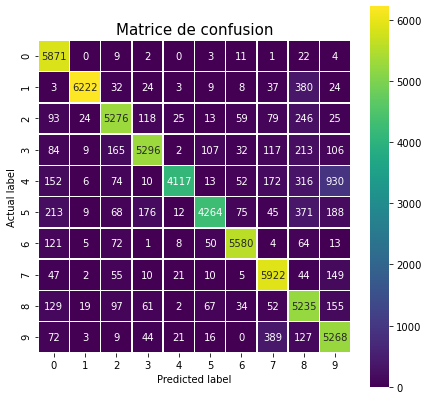

In [155]:
c_m = confusion_matrix(y_app, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(c_m, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Matrice de confusion", size = 15)
plt.show()

Notre matrice de confusion regroupe les vrais positifs et les faux négatifs de chaque classe. Pour exemple, la première ligne de notre matrice regroupe les résultats de prédiction à déterminer une image comme chiffre 0. Sur l'ensemble du dataset, notre modèle identifie correctement 5871 image contenant le chiffre 0 (sur 5923). Les autres sont considérés comme des faux négatifs, des images représentant le chiffre 0 qu'il n'a pas su classer correctement, en les considérant comme d'autres chiffres.

Si notre modèle était parfait, identifiant 100% des chiffres avec exactitude, notre matrice ressemblerait ainsi :

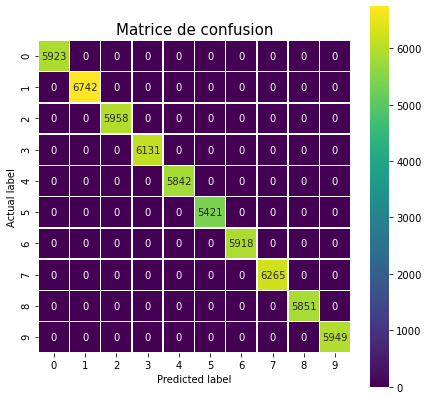

In [156]:
perfect_c_m = confusion_matrix(y_app, y_app)
plt.figure(figsize=(7,7))
sns.heatmap(perfect_c_m, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Matrice de confusion", size = 15)
plt.show()